## インポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('dataset.csv')
test = pd.read_csv('test.csv')
train.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
1,1,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2,2,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany


## データの中身確認 

In [2]:
train.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,17817.000000,17817.000000,1.781700e+04,1.781700e+04,1.781700e+04,1.781700e+04,1.781700e+04,1.781700e+04,1.781700e+04,17817.000000,17817.000000
mean,8908.000000,1.408313,8.500089e+05,2.933371e+05,2.952880e+05,2.292022e+04,2.384615e+05,1.813521e+05,5.403024e+04,3079.168943,2016.139361
std,5143.469209,0.403787,3.450806e+06,1.266445e+06,1.204917e+06,1.078728e+05,9.810715e+05,7.423618e+05,2.427115e+05,17592.439916,0.933551
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,4454.000000,1.100000,1.081727e+04,8.577400e+02,3.016270e+03,0.000000e+00,5.011370e+03,2.783850e+03,1.248100e+02,0.000000,2015.000000
50%,8908.000000,1.370000,1.073768e+05,8.637110e+03,2.917856e+04,1.851100e+02,3.967601e+04,2.626785e+04,2.633320e+03,0.000000,2016.000000
75%,13362.000000,1.670000,4.327297e+05,1.112640e+05,1.502989e+05,6.277210e+03,1.103320e+05,8.315644e+04,2.187064e+04,128.750000,2017.000000
max,17816.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [3]:
# 欠損値があるか確認
train.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [4]:
# それぞれの列のデータの型を確認
train.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
# string型のカラム、region、typeのそれぞれのユニークな数を確認
region_u = train['region'].unique()
type_u = train['type'].unique()
print('region :',region_u)
print('types: ',len(region_u))
print('type: ',type_u)
print('types: ',len(type_u))

region : ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']
types:  54
type:  ['conventional' 'organic']
types:  2


## 前処理

In [6]:
# regionは54種類もあり、one-hot表現でベクトル化すると説明変数の量が多くなるので、今回は除去
train.drop(['region'], axis=1, inplace=True)
test.drop(['region'],axis=1,inplace=True)
train.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015
1,1,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015
2,2,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015


In [7]:
    # type列は、organicは１に、conventionalは０にする
train['type'] = train['type'].apply(lambda x : 1 if x == 'organic' else 0)
test['type'] = test['type'].apply(lambda x : 1 if x == 'organic' else 0)
print(train['type'].unique())

[0 1]


In [8]:
# date列をMonthとDayに分割。元のDateはobject型で学習に使用できないので除去
train['Month'] = train['Date'].apply(lambda x : int(x.split('-')[1]))
train['Day'] = train['Date'].apply(lambda x : int(x.split('-')[2]))
train = train.drop(['Date'],axis=1)

test['Month'] = test['Date'].apply(lambda x : int(x.split('-')[1]))
test['Day'] = test['Date'].apply(lambda x : int(x.split('-')[2]))
test = test.drop(['Date'],axis=1)

In [9]:
from sklearn.model_selection import train_test_split
# 説明変数と目的変数に分割
X = train.drop(['AveragePrice'], axis=1)
y = train['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=False)

## モデル構築　予測

## RandomForest

In [10]:
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import RandomizedSearchCV
params = {
    'max_depth':[2,4,6,8,None],
    'n_estimators':[50,100,300,500],
    'max_features':range(2,13),
    'min_samples_split':range(2,13),
    'min_samples_leaf':range(1,13)
}
rscv =  RandomizedSearchCV(RF(),params,cv=3,n_iter=100,n_jobs=-1,verbose=1)
rscv.fit(X_train,y_train)
print('Best score: {}'.format(rscv.best_score_))
print('Best parameters: {}'.format(rscv.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.6min finished


Best score: -0.03969321944918603
Best parameters: {'n_estimators': 50, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 6, 'max_depth': None}


In [11]:
print('Train Score: ', rscv.score(X_train, y_train))

Train Score:  0.9598713541172744


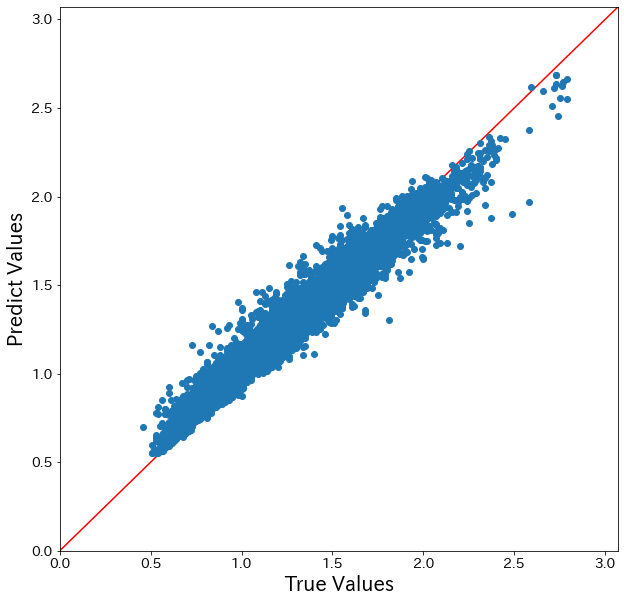

In [12]:
plt.figure(figsize=[10,10])
y_pred = rscv.predict(X_train)
axis_range = [0, np.max([np.max(y_train),np.max(y_pred)])*1.1]
plt.xlim(axis_range)
plt.ylim(axis_range)
plt.xlabel('True Values', fontsize=20)
plt.ylabel('Predict Values', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(axis_range, axis_range, color='red', zorder=-1)
plt.scatter(
    y_train,
    y_pred
)
plt.show()

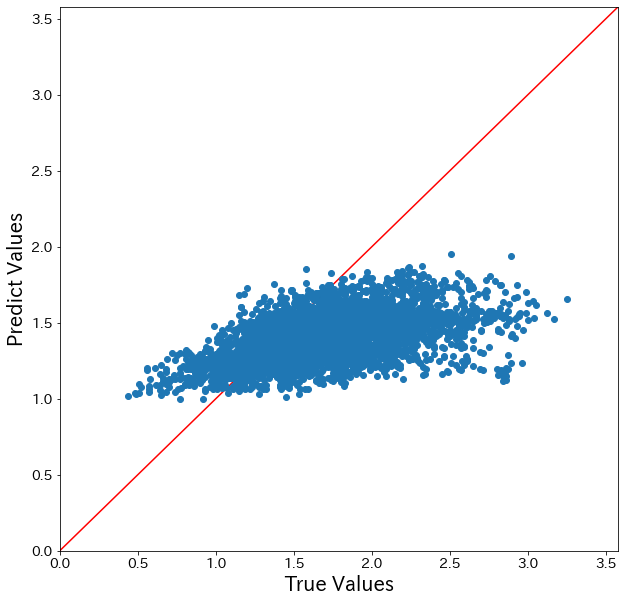

In [13]:
plt.figure(figsize=[10,10])
y_pred = rscv.predict(X_test)
axis_range = [0, np.max([np.max(y_test),np.max(y_pred)])*1.1]
plt.xlim(axis_range)
plt.ylim(axis_range)
plt.xlabel('True Values', fontsize=20)
plt.ylabel('Predict Values', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(axis_range, axis_range, color='red', zorder=-1)
plt.scatter(
    y_test,
    y_pred
)
plt.show()

In [14]:
rf = RF(n_estimators = 100, random_state = 0, max_features = 2)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.9863395806708735

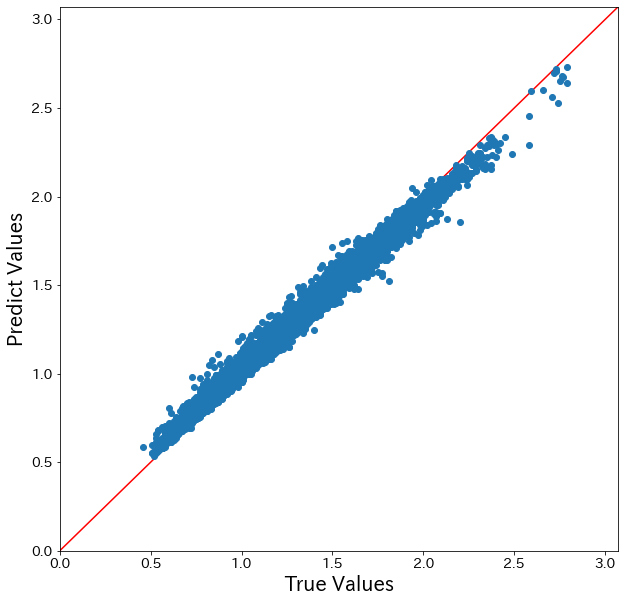

In [15]:
plt.figure(figsize=[10,10])
y_pred = rf.predict(X_train)
axis_range = [0, np.max([np.max(y_train),np.max(y_pred)])*1.1]
plt.xlim(axis_range)
plt.ylim(axis_range)
plt.xlabel('True Values', fontsize=20)
plt.ylabel('Predict Values', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(axis_range, axis_range, color='red', zorder=-1)
plt.scatter(
    y_train,
    y_pred
)
plt.show()

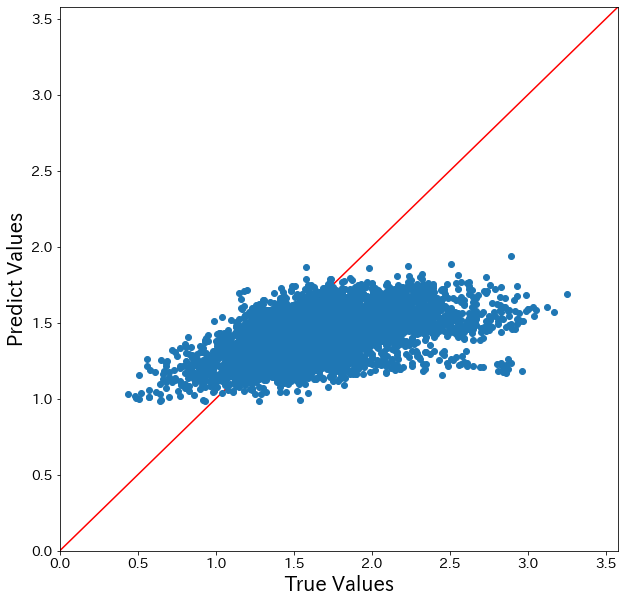

In [16]:
plt.figure(figsize=[10,10])
y_pred = rf.predict(X_test)
axis_range = [0, np.max([np.max(y_test),np.max(y_pred)])*1.1]
plt.xlim(axis_range)
plt.ylim(axis_range)
plt.xlabel('True Values', fontsize=20)
plt.ylabel('Predict Values', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(axis_range, axis_range, color='red', zorder=-1)
plt.scatter(
    y_test,
    y_pred
)
plt.show()

validation_dataを設けずにモデルを構築

In [17]:
rf_2 = RF(n_estimators = 100, random_state = 0, max_features = 2)
rf_2.fit(X,y)
rf_2.score(X,y)

0.9842651526180163

In [18]:
pred = rf_2.predict(test)

In [19]:
test['pred'] = pred

In [20]:
test

,Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,pred
0,0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,12,27,1.2781
1,1,386100.49,292097.36,27350.92,297.90,66354.31,48605.95,17748.36,0.00,0,2015,12,27,1.0450
2,2,596819.40,40450.49,394104.02,17353.79,144911.10,142543.88,2367.22,0.00,0,2015,12,27,1.1335
3,3,62909.69,30482.25,2971.94,5894.40,23561.10,23520.19,5.69,35.22,0,2015,12,27,1.0504
4,4,450816.39,3886.27,346964.70,13952.56,86012.86,85913.60,99.26,0.00,0,2015,12,27,1.1158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,427,14503.47,78.95,148.37,0.00,14276.15,9992.31,4283.84,0.00,1,2018,3,25,1.4080
428,428,10028.49,138.15,773.22,0.00,9117.12,8208.82,908.30,0.00,1,2018,3,25,1.5143
429,429,1559967.20,121007.94,342853.10,1070.24,1093861.09,902774.79,190941.84,144.46,1,2018,3,25,1.3798
430,430,271723.08,26996.28,77861.39,117.56,166747.85,87108.00,79495.39,144.46,1,2018,3,25,1.2811


In [31]:
test.to_csv('submit_rf.csv')

## Lidge

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

In [22]:
a_list = [0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000,10000] # alpha
f_list = [True,False] # fit_intercept
n_list = [True,False] # normalize
c_list = [True,False] # copy_X
m_list = [None,0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000,10000] # max_iter
t_list = [None,0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000,10000] # tol
s_list = ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga'] # solver
r_list = [None,0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000,10000] # random_state
ridge = RandomizedSearchCV(Ridge(),{"alpha":a_list,"fit_intercept":f_list,"normalize":n_list,"copy_X":c_list,"max_iter":m_list,"random_state":r_list}) #ランダムサーチ
ridge.fit(X_train,y_train)
print("Ridge score: {}".format(ridge.best_score_))
print("Ridge parameters: {}".format(ridge.best_params_))

/Users/sen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/sen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.2081e-17): result may not be accurate.
  overwrite_a=True).T
/Users/sen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.70273e-18): result may not be accurate.
  overwrite_a=True).T
/Users/sen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.45315e-23): result may not be accurate.
  overwrite_a=True).T
/Users/sen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.68971e-17): 

Ridge score: -0.1433000196293961
Ridge parameters: {'random_state': 0.01, 'normalize': False, 'max_iter': 1e-05, 'fit_intercept': False, 'copy_X': True, 'alpha': 10000}


/Users/sen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.18619e-22): result may not be accurate.
  overwrite_a=True).T
/Users/sen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.96129e-17): result may not be accurate.
  overwrite_a=True).T
/Users/sen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.91896e-18): result may not be accurate.
  overwrite_a=True).T
/Users/sen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.18619e-20): result may not be accurate.
  overwrite_a=True).T


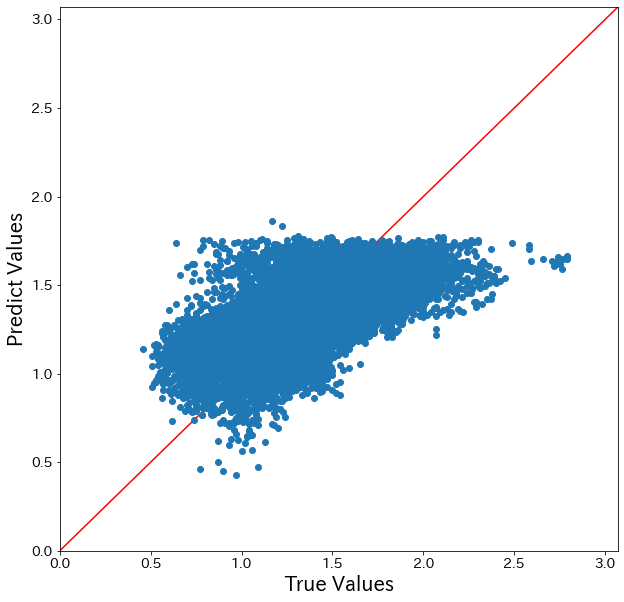

In [23]:
plt.figure(figsize=[10,10])
y_pred_r = ridge.predict(X_train)
axis_range = [0, np.max([np.max(y_train),np.max(y_pred_r)])*1.1]
plt.xlim(axis_range)
plt.ylim(axis_range)
plt.xlabel('True Values', fontsize=20)
plt.ylabel('Predict Values', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(axis_range, axis_range, color='red', zorder=-1)
plt.scatter(
    y_train,
    y_pred_r
)
plt.show()

## Lasso

In [24]:
from sklearn.linear_model import Lasso

In [25]:
a_list = [0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000,10000] # alpha
f_list = [True,False] # fit_intercept
n_list = [True,False] # normalize
p_list = [True,False]# precompute
c_list = [True,False] # copy_X
m_list = [None,0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000,10000] # max_iter
t_list = [None,0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000,10000] # tol
r_list = [None,0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000,10000] # random_state

lasso = RandomizedSearchCV(Lasso(),{"alpha":a_list,"fit_intercept":f_list,"normalize":n_list,"precompute":p_list,"copy_X":c_list},cv=5) #ランダムサーチ
lasso.fit(X_train,y_train)
print("Lasso score: {}".format(lasso.best_score_))
print("Lasso parameters: {}".format(lasso.best_params_))

/Users/sen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.0258204478597, tolerance: 0.13033066811146746
  tol, rng, random, positive)
/Users/sen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.374296962367225, tolerance: 0.12459219091109551
  tol, rng, random, positive)
/Users/sen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.41495864592093, tolerance: 0.12646750386488922
  tol, rng, random, positive)
/Users/sen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarn

Lasso score: 0.03980014421452704
Lasso parameters: {'precompute': True, 'normalize': True, 'fit_intercept': False, 'copy_X': True, 'alpha': 0.0001}


/Users/sen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.99925127325565, tolerance: 0.09617422039691292
  positive)
/Users/sen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.69117437642495, tolerance: 1.9464538199999997
  tol, rng, random, positive)
/Users/sen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 303.1776370033519, tolerance: 1.9204628899999994
  tol, rng, random, positive)
/Users/sen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did

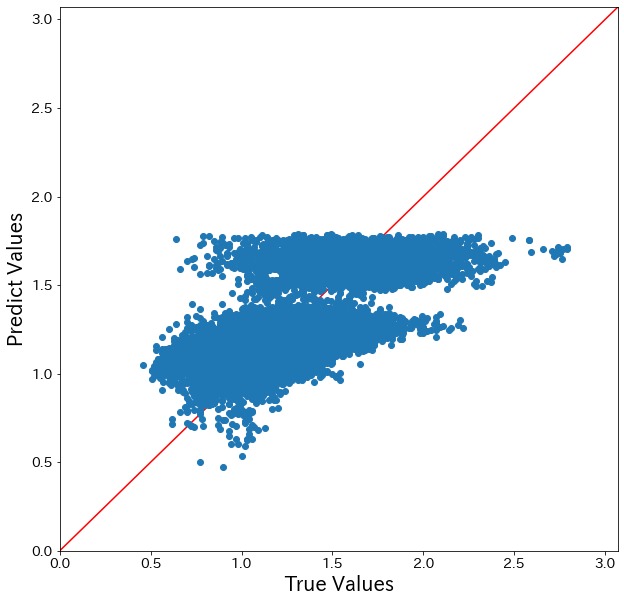

In [26]:
plt.figure(figsize=[10,10])
y_pred_l = lasso.predict(X_train)
axis_range = [0, np.max([np.max(y_train),np.max(y_pred_l)])*1.1]
plt.xlim(axis_range)
plt.ylim(axis_range)
plt.xlabel('True Values', fontsize=20)
plt.ylabel('Predict Values', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(axis_range, axis_range, color='red', zorder=-1)
plt.scatter(
    y_train,
    y_pred_l
)
plt.show()

In [27]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Activation,InputLayer,Dense,Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


Train on 8729 samples, validate on 3742 samples
Epoch 1/1000
8729/8729 [==============================] - 0s 47us/step - loss: 3792525.2500 - accuracy: 0.0000e+00 - val_loss: 354440.5625 - val_accuracy: 0.0000e+00
Epoch 2/1000
8729/8729 [==============================] - 0s 2us/step - loss: 2962836.2500 - accuracy: 1.1456e-04 - val_loss: 211467.5156 - val_accuracy: 2.6724e-04
Epoch 3/1000
8729/8729 [==============================] - 0s 3us/step - loss: 2230832.0000 - accuracy: 2.2912e-04 - val_loss: 108341.4609 - val_accuracy: 5.3447e-04
Epoch 4/1000
8729/8729 [==============================] - 0s 2us/step - loss: 1416335.7500 - accuracy: 2.2912e-04 - val_loss: 47907.3008 - val_accuracy: 2.6724e-04
Epoch 5/1000
8729/8729 [==============================] - 0s 2us/step - loss: 786940.0000 - accuracy: 1.1456e-04 - val_loss: 18478.7832 - val_accuracy: 0.0021
Epoch 6/1000
8729/8729 [==============================] - 0s 3us/step - loss: 554952.1875 - accuracy: 2.2912e-04 - val_loss: 4799.811

Epoch 53/1000
8729/8729 [==============================] - 0s 3us/step - loss: 577.9026 - accuracy: 0.0000e+00 - val_loss: 2.7322 - val_accuracy: 0.0000e+00
Epoch 54/1000
8729/8729 [==============================] - 0s 2us/step - loss: 213.4120 - accuracy: 3.4368e-04 - val_loss: 2.7321 - val_accuracy: 0.0000e+00
Epoch 55/1000
8729/8729 [==============================] - 0s 2us/step - loss: 2607.0012 - accuracy: 3.4368e-04 - val_loss: 2.7321 - val_accuracy: 0.0000e+00
Epoch 56/1000
8729/8729 [==============================] - 0s 3us/step - loss: 488.8632 - accuracy: 4.5824e-04 - val_loss: 2.7320 - val_accuracy: 0.0000e+00
Epoch 57/1000
8729/8729 [==============================] - 0s 3us/step - loss: 1273.5017 - accuracy: 2.2912e-04 - val_loss: 2.7320 - val_accuracy: 0.0000e+00
Epoch 58/1000
8729/8729 [==============================] - 0s 3us/step - loss: 410.9366 - accuracy: 2.2912e-04 - val_loss: 2.7319 - val_accuracy: 0.0000e+00
Epoch 59/1000
8729/8729 [==============================]

Epoch 106/1000
8729/8729 [==============================] - 0s 2us/step - loss: 78.8158 - accuracy: 0.0000e+00 - val_loss: 2.7298 - val_accuracy: 0.0000e+00
Epoch 107/1000
8729/8729 [==============================] - 0s 2us/step - loss: 2171.0242 - accuracy: 1.1456e-04 - val_loss: 2.7298 - val_accuracy: 0.0000e+00
Epoch 108/1000
8729/8729 [==============================] - 0s 2us/step - loss: 45.6478 - accuracy: 0.0000e+00 - val_loss: 2.7297 - val_accuracy: 0.0000e+00
Epoch 109/1000
8729/8729 [==============================] - 0s 2us/step - loss: 337.7326 - accuracy: 0.0000e+00 - val_loss: 2.7296 - val_accuracy: 0.0000e+00
Epoch 110/1000
8729/8729 [==============================] - 0s 1us/step - loss: 104.1883 - accuracy: 1.1456e-04 - val_loss: 2.7296 - val_accuracy: 0.0000e+00
Epoch 111/1000
8729/8729 [==============================] - 0s 2us/step - loss: 152.2303 - accuracy: 2.2912e-04 - val_loss: 2.7295 - val_accuracy: 0.0000e+00
Epoch 112/1000
8729/8729 [===========================

Epoch 158/1000
8729/8729 [==============================] - 0s 2us/step - loss: 1047.7068 - accuracy: 0.0000e+00 - val_loss: 2.7263 - val_accuracy: 0.0000e+00
Epoch 159/1000
8729/8729 [==============================] - 0s 2us/step - loss: 1135.0087 - accuracy: 2.2912e-04 - val_loss: 2.7262 - val_accuracy: 0.0000e+00
Epoch 160/1000
8729/8729 [==============================] - 0s 2us/step - loss: 277.0094 - accuracy: 1.1456e-04 - val_loss: 2.7262 - val_accuracy: 0.0000e+00
Epoch 161/1000
8729/8729 [==============================] - 0s 2us/step - loss: 2753.4258 - accuracy: 0.0000e+00 - val_loss: 2.7261 - val_accuracy: 0.0000e+00
Epoch 162/1000
8729/8729 [==============================] - 0s 2us/step - loss: 48.7471 - accuracy: 1.1456e-04 - val_loss: 2.7260 - val_accuracy: 0.0000e+00
Epoch 163/1000
8729/8729 [==============================] - 0s 2us/step - loss: 217.3150 - accuracy: 1.1456e-04 - val_loss: 2.7259 - val_accuracy: 0.0000e+00
Epoch 164/1000
8729/8729 [========================

Epoch 210/1000
8729/8729 [==============================] - 0s 2us/step - loss: 414.8513 - accuracy: 0.0000e+00 - val_loss: 2.7222 - val_accuracy: 0.0000e+00
Epoch 211/1000
8729/8729 [==============================] - 0s 2us/step - loss: 56.9488 - accuracy: 0.0000e+00 - val_loss: 2.7221 - val_accuracy: 0.0000e+00
Epoch 212/1000
8729/8729 [==============================] - 0s 2us/step - loss: 291.9189 - accuracy: 0.0000e+00 - val_loss: 2.7221 - val_accuracy: 0.0000e+00
Epoch 213/1000
8729/8729 [==============================] - 0s 2us/step - loss: 661.0665 - accuracy: 0.0000e+00 - val_loss: 2.7220 - val_accuracy: 0.0000e+00
Epoch 214/1000
8729/8729 [==============================] - 0s 2us/step - loss: 44.1994 - accuracy: 1.1456e-04 - val_loss: 2.7219 - val_accuracy: 0.0000e+00
Epoch 215/1000
8729/8729 [==============================] - 0s 2us/step - loss: 46.6563 - accuracy: 0.0000e+00 - val_loss: 2.7218 - val_accuracy: 0.0000e+00
Epoch 216/1000
8729/8729 [=============================

8729/8729 [==============================] - 0s 2us/step - loss: 417.3445 - accuracy: 0.0000e+00 - val_loss: 2.7178 - val_accuracy: 0.0000e+00
Epoch 263/1000
8729/8729 [==============================] - 0s 2us/step - loss: 169.2461 - accuracy: 0.0000e+00 - val_loss: 2.7177 - val_accuracy: 0.0000e+00
Epoch 264/1000
8729/8729 [==============================] - 0s 2us/step - loss: 94.7756 - accuracy: 0.0000e+00 - val_loss: 2.7176 - val_accuracy: 0.0000e+00
Epoch 265/1000
8729/8729 [==============================] - 0s 2us/step - loss: 99.1907 - accuracy: 1.1456e-04 - val_loss: 2.7175 - val_accuracy: 0.0000e+00
Epoch 266/1000
8729/8729 [==============================] - 0s 2us/step - loss: 130.5126 - accuracy: 0.0000e+00 - val_loss: 2.7174 - val_accuracy: 0.0000e+00
Epoch 267/1000
8729/8729 [==============================] - 0s 3us/step - loss: 56.9676 - accuracy: 0.0000e+00 - val_loss: 2.7173 - val_accuracy: 0.0000e+00
Epoch 268/1000
8729/8729 [==============================] - 0s 2us/ste

Epoch 315/1000
8729/8729 [==============================] - 0s 2us/step - loss: 48.3745 - accuracy: 0.0000e+00 - val_loss: 2.7129 - val_accuracy: 0.0000e+00
Epoch 316/1000
8729/8729 [==============================] - 0s 2us/step - loss: 525.4257 - accuracy: 0.0000e+00 - val_loss: 2.7128 - val_accuracy: 0.0000e+00
Epoch 317/1000
8729/8729 [==============================] - 0s 2us/step - loss: 69.5458 - accuracy: 0.0000e+00 - val_loss: 2.7127 - val_accuracy: 0.0000e+00
Epoch 318/1000
8729/8729 [==============================] - 0s 2us/step - loss: 32.5141 - accuracy: 0.0000e+00 - val_loss: 2.7126 - val_accuracy: 0.0000e+00
Epoch 319/1000
8729/8729 [==============================] - 0s 1us/step - loss: 23.6600 - accuracy: 0.0000e+00 - val_loss: 2.7125 - val_accuracy: 0.0000e+00
Epoch 320/1000
8729/8729 [==============================] - 0s 2us/step - loss: 30.6866 - accuracy: 1.1456e-04 - val_loss: 2.7124 - val_accuracy: 0.0000e+00
Epoch 321/1000
8729/8729 [==============================]

8729/8729 [==============================] - 0s 2us/step - loss: 398.1708 - accuracy: 0.0000e+00 - val_loss: 2.7077 - val_accuracy: 0.0000e+00
Epoch 368/1000
8729/8729 [==============================] - 0s 3us/step - loss: 46.3376 - accuracy: 0.0000e+00 - val_loss: 2.7076 - val_accuracy: 0.0000e+00
Epoch 369/1000
8729/8729 [==============================] - 0s 4us/step - loss: 72.2550 - accuracy: 1.1456e-04 - val_loss: 2.7075 - val_accuracy: 0.0000e+00
Epoch 370/1000
8729/8729 [==============================] - 0s 3us/step - loss: 25.6474 - accuracy: 0.0000e+00 - val_loss: 2.7073 - val_accuracy: 0.0000e+00
Epoch 371/1000
8729/8729 [==============================] - 0s 2us/step - loss: 24.6919 - accuracy: 0.0000e+00 - val_loss: 2.7072 - val_accuracy: 0.0000e+00
Epoch 372/1000
8729/8729 [==============================] - 0s 3us/step - loss: 16.8475 - accuracy: 1.1456e-04 - val_loss: 2.7071 - val_accuracy: 0.0000e+00
Epoch 373/1000
8729/8729 [==============================] - 0s 2us/step 

Epoch 420/1000
8729/8729 [==============================] - 0s 2us/step - loss: 251.2609 - accuracy: 0.0000e+00 - val_loss: 2.7019 - val_accuracy: 0.0000e+00
Epoch 421/1000
8729/8729 [==============================] - 0s 2us/step - loss: 59.1376 - accuracy: 0.0000e+00 - val_loss: 2.7017 - val_accuracy: 0.0000e+00
Epoch 422/1000
8729/8729 [==============================] - 0s 3us/step - loss: 94.6335 - accuracy: 1.1456e-04 - val_loss: 2.7016 - val_accuracy: 0.0000e+00
Epoch 423/1000
8729/8729 [==============================] - 0s 3us/step - loss: 152.0573 - accuracy: 0.0000e+00 - val_loss: 2.7015 - val_accuracy: 0.0000e+00
Epoch 424/1000
8729/8729 [==============================] - 0s 2us/step - loss: 26.1126 - accuracy: 0.0000e+00 - val_loss: 2.7014 - val_accuracy: 0.0000e+00
Epoch 425/1000
8729/8729 [==============================] - 0s 3us/step - loss: 2038.5708 - accuracy: 0.0000e+00 - val_loss: 2.7013 - val_accuracy: 0.0000e+00
Epoch 426/1000
8729/8729 [============================

Epoch 473/1000
8729/8729 [==============================] - 0s 2us/step - loss: 45.4232 - accuracy: 0.0000e+00 - val_loss: 2.6956 - val_accuracy: 0.0000e+00
Epoch 474/1000
8729/8729 [==============================] - 0s 2us/step - loss: 255.8984 - accuracy: 1.1456e-04 - val_loss: 2.6955 - val_accuracy: 0.0000e+00
Epoch 475/1000
8729/8729 [==============================] - 0s 2us/step - loss: 10.8545 - accuracy: 0.0000e+00 - val_loss: 2.6954 - val_accuracy: 0.0000e+00
Epoch 476/1000
8729/8729 [==============================] - 0s 2us/step - loss: 42.9895 - accuracy: 0.0000e+00 - val_loss: 2.6953 - val_accuracy: 0.0000e+00
Epoch 477/1000
8729/8729 [==============================] - 0s 2us/step - loss: 16.2033 - accuracy: 0.0000e+00 - val_loss: 2.6951 - val_accuracy: 0.0000e+00
Epoch 478/1000
8729/8729 [==============================] - 0s 2us/step - loss: 47.3731 - accuracy: 0.0000e+00 - val_loss: 2.6950 - val_accuracy: 0.0000e+00
Epoch 479/1000
8729/8729 [==============================]

8729/8729 [==============================] - 0s 2us/step - loss: 28.7449 - accuracy: 0.0000e+00 - val_loss: 2.6892 - val_accuracy: 0.0000e+00
Epoch 526/1000
8729/8729 [==============================] - 0s 2us/step - loss: 7.1888 - accuracy: 0.0000e+00 - val_loss: 2.6891 - val_accuracy: 0.0000e+00
Epoch 527/1000
8729/8729 [==============================] - 0s 2us/step - loss: 54.8481 - accuracy: 0.0000e+00 - val_loss: 2.6890 - val_accuracy: 0.0000e+00
Epoch 528/1000
8729/8729 [==============================] - 0s 2us/step - loss: 179.5462 - accuracy: 0.0000e+00 - val_loss: 2.6889 - val_accuracy: 0.0000e+00
Epoch 529/1000
8729/8729 [==============================] - 0s 2us/step - loss: 15.1184 - accuracy: 0.0000e+00 - val_loss: 2.6888 - val_accuracy: 0.0000e+00
Epoch 530/1000
8729/8729 [==============================] - 0s 2us/step - loss: 198.7782 - accuracy: 0.0000e+00 - val_loss: 2.6886 - val_accuracy: 0.0000e+00
Epoch 531/1000
8729/8729 [==============================] - 0s 2us/step 

Epoch 578/1000
8729/8729 [==============================] - 0s 2us/step - loss: 12.8533 - accuracy: 0.0000e+00 - val_loss: 2.6823 - val_accuracy: 0.0000e+00
Epoch 579/1000
8729/8729 [==============================] - 0s 2us/step - loss: 33.4446 - accuracy: 0.0000e+00 - val_loss: 2.6822 - val_accuracy: 0.0000e+00
Epoch 580/1000
8729/8729 [==============================] - 0s 2us/step - loss: 46.1997 - accuracy: 0.0000e+00 - val_loss: 2.6820 - val_accuracy: 0.0000e+00
Epoch 581/1000
8729/8729 [==============================] - 0s 2us/step - loss: 55.8987 - accuracy: 0.0000e+00 - val_loss: 2.6819 - val_accuracy: 0.0000e+00
Epoch 582/1000
8729/8729 [==============================] - 0s 2us/step - loss: 7.4378 - accuracy: 0.0000e+00 - val_loss: 2.6818 - val_accuracy: 0.0000e+00
Epoch 583/1000
8729/8729 [==============================] - 0s 2us/step - loss: 25.6569 - accuracy: 0.0000e+00 - val_loss: 2.6816 - val_accuracy: 0.0000e+00
Epoch 584/1000
8729/8729 [==============================] -

Epoch 631/1000
8729/8729 [==============================] - 0s 2us/step - loss: 11.9528 - accuracy: 0.0000e+00 - val_loss: 2.6748 - val_accuracy: 0.0000e+00
Epoch 632/1000
8729/8729 [==============================] - 0s 2us/step - loss: 19.3278 - accuracy: 0.0000e+00 - val_loss: 2.6747 - val_accuracy: 0.0000e+00
Epoch 633/1000
8729/8729 [==============================] - 0s 2us/step - loss: 9.6657 - accuracy: 0.0000e+00 - val_loss: 2.6745 - val_accuracy: 0.0000e+00
Epoch 634/1000
8729/8729 [==============================] - 0s 2us/step - loss: 17.9412 - accuracy: 0.0000e+00 - val_loss: 2.6744 - val_accuracy: 0.0000e+00
Epoch 635/1000
8729/8729 [==============================] - 0s 2us/step - loss: 1413.6863 - accuracy: 0.0000e+00 - val_loss: 2.6742 - val_accuracy: 0.0000e+00
Epoch 636/1000
8729/8729 [==============================] - 0s 2us/step - loss: 32.0757 - accuracy: 0.0000e+00 - val_loss: 2.6741 - val_accuracy: 0.0000e+00
Epoch 637/1000
8729/8729 [==============================]

Epoch 684/1000
8729/8729 [==============================] - 0s 2us/step - loss: 51.6839 - accuracy: 0.0000e+00 - val_loss: 2.6669 - val_accuracy: 0.0000e+00
Epoch 685/1000
8729/8729 [==============================] - 0s 2us/step - loss: 6.1917 - accuracy: 0.0000e+00 - val_loss: 2.6668 - val_accuracy: 0.0000e+00
Epoch 686/1000
8729/8729 [==============================] - 0s 2us/step - loss: 4.2243 - accuracy: 0.0000e+00 - val_loss: 2.6666 - val_accuracy: 0.0000e+00
Epoch 687/1000
8729/8729 [==============================] - 0s 2us/step - loss: 76.4766 - accuracy: 0.0000e+00 - val_loss: 2.6665 - val_accuracy: 0.0000e+00
Epoch 688/1000
8729/8729 [==============================] - 0s 2us/step - loss: 41.2298 - accuracy: 0.0000e+00 - val_loss: 2.6663 - val_accuracy: 0.0000e+00
Epoch 689/1000
8729/8729 [==============================] - 0s 2us/step - loss: 4.7235 - accuracy: 0.0000e+00 - val_loss: 2.6662 - val_accuracy: 0.0000e+00
Epoch 690/1000
8729/8729 [==============================] - 0

Epoch 737/1000
8729/8729 [==============================] - 0s 2us/step - loss: 78.8975 - accuracy: 0.0000e+00 - val_loss: 2.6587 - val_accuracy: 0.0000e+00
Epoch 738/1000
8729/8729 [==============================] - 0s 2us/step - loss: 224.3842 - accuracy: 0.0000e+00 - val_loss: 2.6585 - val_accuracy: 0.0000e+00
Epoch 739/1000
8729/8729 [==============================] - 0s 2us/step - loss: 89.3469 - accuracy: 0.0000e+00 - val_loss: 2.6584 - val_accuracy: 0.0000e+00
Epoch 740/1000
8729/8729 [==============================] - 0s 2us/step - loss: 75.2087 - accuracy: 0.0000e+00 - val_loss: 2.6582 - val_accuracy: 0.0000e+00
Epoch 741/1000
8729/8729 [==============================] - 0s 2us/step - loss: 6.0863 - accuracy: 0.0000e+00 - val_loss: 2.6580 - val_accuracy: 0.0000e+00
Epoch 742/1000
8729/8729 [==============================] - 0s 2us/step - loss: 98.0837 - accuracy: 1.1456e-04 - val_loss: 2.6579 - val_accuracy: 0.0000e+00
Epoch 743/1000
8729/8729 [==============================] 

Epoch 790/1000
8729/8729 [==============================] - 0s 2us/step - loss: 10.1124 - accuracy: 0.0000e+00 - val_loss: 2.6500 - val_accuracy: 0.0000e+00
Epoch 791/1000
8729/8729 [==============================] - 0s 2us/step - loss: 11.2823 - accuracy: 0.0000e+00 - val_loss: 2.6499 - val_accuracy: 0.0000e+00
Epoch 792/1000
8729/8729 [==============================] - 0s 2us/step - loss: 16.4206 - accuracy: 0.0000e+00 - val_loss: 2.6497 - val_accuracy: 0.0000e+00
Epoch 793/1000
8729/8729 [==============================] - 0s 2us/step - loss: 13.6035 - accuracy: 0.0000e+00 - val_loss: 2.6495 - val_accuracy: 0.0000e+00
Epoch 794/1000
8729/8729 [==============================] - 0s 1us/step - loss: 25.8139 - accuracy: 1.1456e-04 - val_loss: 2.6494 - val_accuracy: 0.0000e+00
Epoch 795/1000
8729/8729 [==============================] - 0s 1us/step - loss: 4.6555 - accuracy: 1.1456e-04 - val_loss: 2.6492 - val_accuracy: 0.0000e+00
Epoch 796/1000
8729/8729 [==============================] -

Epoch 843/1000
8729/8729 [==============================] - 0s 4us/step - loss: 17.8168 - accuracy: 1.1456e-04 - val_loss: 2.6410 - val_accuracy: 0.0000e+00
Epoch 844/1000
8729/8729 [==============================] - 0s 2us/step - loss: 3.2369 - accuracy: 0.0000e+00 - val_loss: 2.6409 - val_accuracy: 0.0000e+00
Epoch 845/1000
8729/8729 [==============================] - 0s 2us/step - loss: 25.8214 - accuracy: 0.0000e+00 - val_loss: 2.6407 - val_accuracy: 0.0000e+00
Epoch 846/1000
8729/8729 [==============================] - 0s 3us/step - loss: 44.2044 - accuracy: 0.0000e+00 - val_loss: 2.6405 - val_accuracy: 0.0000e+00
Epoch 847/1000
8729/8729 [==============================] - 0s 3us/step - loss: 4.7529 - accuracy: 0.0000e+00 - val_loss: 2.6403 - val_accuracy: 0.0000e+00
Epoch 848/1000
8729/8729 [==============================] - 0s 4us/step - loss: 337.4816 - accuracy: 0.0000e+00 - val_loss: 2.6402 - val_accuracy: 0.0000e+00
Epoch 849/1000
8729/8729 [==============================] -

Epoch 896/1000
8729/8729 [==============================] - 0s 3us/step - loss: 9.3019 - accuracy: 0.0000e+00 - val_loss: 2.6319 - val_accuracy: 0.0000e+00
Epoch 897/1000
8729/8729 [==============================] - 0s 2us/step - loss: 10.3029 - accuracy: 0.0000e+00 - val_loss: 2.6317 - val_accuracy: 0.0000e+00
Epoch 898/1000
8729/8729 [==============================] - 0s 4us/step - loss: 374.5885 - accuracy: 0.0000e+00 - val_loss: 2.6316 - val_accuracy: 0.0000e+00
Epoch 899/1000
8729/8729 [==============================] - 0s 3us/step - loss: 19.1745 - accuracy: 1.1456e-04 - val_loss: 2.6314 - val_accuracy: 0.0000e+00
Epoch 900/1000
8729/8729 [==============================] - 0s 3us/step - loss: 3.7990 - accuracy: 0.0000e+00 - val_loss: 2.6312 - val_accuracy: 0.0000e+00
Epoch 901/1000
8729/8729 [==============================] - 0s 4us/step - loss: 5.0699 - accuracy: 0.0000e+00 - val_loss: 2.6310 - val_accuracy: 0.0000e+00
Epoch 902/1000
8729/8729 [==============================] - 

Epoch 949/1000
8729/8729 [==============================] - 0s 2us/step - loss: 4.4043 - accuracy: 0.0000e+00 - val_loss: 2.6222 - val_accuracy: 0.0000e+00
Epoch 950/1000
8729/8729 [==============================] - 0s 3us/step - loss: 5.5005 - accuracy: 0.0000e+00 - val_loss: 2.6221 - val_accuracy: 0.0000e+00
Epoch 951/1000
8729/8729 [==============================] - 0s 2us/step - loss: 2.0173 - accuracy: 1.1456e-04 - val_loss: 2.6219 - val_accuracy: 0.0000e+00
Epoch 952/1000
8729/8729 [==============================] - 0s 2us/step - loss: 4.9001 - accuracy: 0.0000e+00 - val_loss: 2.6217 - val_accuracy: 0.0000e+00
Epoch 953/1000
8729/8729 [==============================] - 0s 2us/step - loss: 5.7486 - accuracy: 0.0000e+00 - val_loss: 2.6215 - val_accuracy: 0.0000e+00
Epoch 954/1000
8729/8729 [==============================] - 0s 2us/step - loss: 10.5302 - accuracy: 0.0000e+00 - val_loss: 2.6213 - val_accuracy: 0.0000e+00
Epoch 955/1000
8729/8729 [==============================] - 0s 

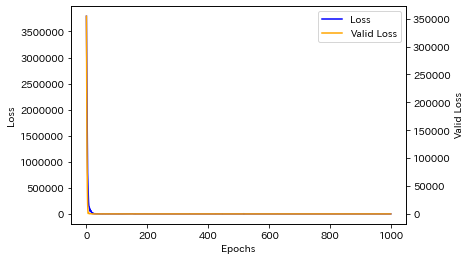

In [28]:
# モデル定義
model = Sequential()  # 空のモデル
model.add(InputLayer(input_shape=(X_train.shape[1],)))  # 入力層を追加
model.add(Dense(10, activation='relu', kernel_initializer='truncated_normal'))  # 中間層を追加
model.add(Dropout(0.2))
model.add(Dense(7, activation='relu', kernel_initializer='truncated_normal'))  # 中間層を追加
model.add(Dropout(0.2))
model.add(Dense(5, activation='relu', kernel_initializer='truncated_normal'))  # 中間層を追加
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))  # 出力層を追加

# 上記で定義したモデルを実際に構築
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['accuracy'])

# Early Stoppingの準備
es = EarlyStopping(patience=10, verbose=1) 

# 学習を実行し、学習過程をresultに格納
result = model.fit(X_train,
               y_train,
               epochs=1000,
               batch_size=10000,
               verbose=1,
               validation_split=0.3,
               callbacks=[es])
# 学習過程を2軸プロット
fig, ax1 = plt.subplots()
ax1.plot(result.epoch, result.history["loss"], color="blue", label="Loss")
ax2 = ax1.twinx()  # 2つのプロットを関連付ける
ax2.plot(result.epoch, result.history["val_loss"], color="orange", label="Valid Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax2.set_ylabel("Valid Loss")

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

plt.show()

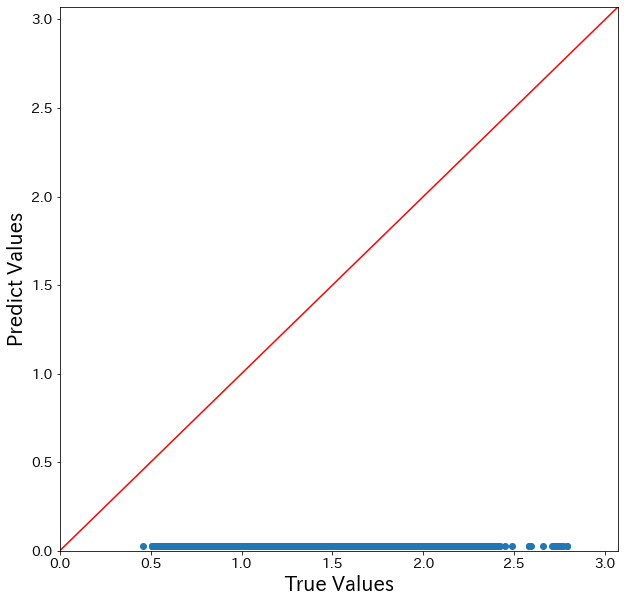

In [29]:
plt.figure(figsize=[10,10])
y_pred_n = model.predict(X_train)
axis_range = [0, np.max([np.max(y_train),np.max(y_pred_n)])*1.1]
plt.xlim(axis_range)
plt.ylim(axis_range)
plt.xlabel('True Values', fontsize=20)
plt.ylabel('Predict Values', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(axis_range, axis_range, color='red', zorder=-1)
plt.scatter(
    y_train,
    y_pred_n
)
plt.show()